## Feature dimension deduction
Patrick 🌰
* 特征降维是无监督学习的另一个应用，目的有二： 其一，我们会经常在实际项目中遭遇特征维度非常高的训练样本，而往往又无法借助自己的领域知识人工构建有效特征；其二，在数据表现方面我们无法用肉眼观测超过三个维度的特征。因此，特征降维不仅重构了有效的低维度特征向量，同时也为数据展现提供了可能。在特征降维的方法中，principal component analysis是最为经典和实用的特征降维技术，特别在辅助图像识别方面有突出的表现。
* Feature dimension reduction is another application of unsupervised learning. There are two purposes: First, we often encounter training samples with very high feature dimensions in actual projects, and often we cannot artificially construct effective features with our own domain knowledge; Second, in terms of data performance, we cannot observe the characteristics of more than three dimensions with human eyes. Therefore, feature dimensionality reduction not only reconstructs effective low-dimensional feature vectors but also provides a method for the data presentation. In the method of feature dimension reduction, the Principal Component Analysis is the most classic and practical feature dimension reduction technology, especially in the image recognition field.

In [1]:
import numpy as np

# Initialize a 2*2 linear correlation matrix.
M = np.array([[1, 2], [2, 4]])

# 计算2*2线性相关矩阵的秩。
# Calculate the rank of the 2*2 linear correlation matrix.
np.linalg.matrix_rank(M, tol=None)

1

### Display the two-dimensional distribution of handwritten digital pictures compressed by PCA
显示手写数字图片经PCA压缩后的二维空间分布

/Users/lipengyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/lipengyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


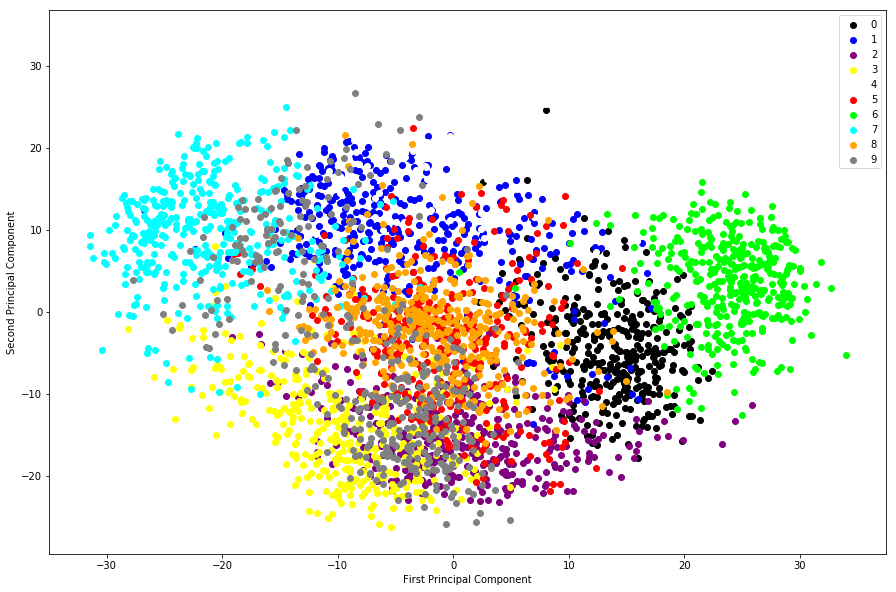

In [10]:
import pandas as pd

# Find the training data of the handwritten picture recognition task 
# from the Internet and store in the variable digits_train.
digits_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', header=None)

# Find the test data of the handwritten picture recognition task 
# from the Internet and store in the variable digits_test.
digits_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes', header=None)

# Segment the feature vectors and markers(labels) of the training data.
X_digits = digits_train[np.arange(64)]
y_digits = digits_train[64]


from sklearn.decomposition import PCA

# Initialize a PCA that can compress high-dimensional feature vectors (64-dimensional) to 2 dimensions.。 
estimator = PCA(n_components=2)
X_pca = estimator.fit_transform(X_digits)



# Display 2-dimensional spatial distribution of 10 types of handwritten digital pictures compressed by PCA.
from matplotlib import pyplot as plt

def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px = X_pca[:, 0][y_digits.as_matrix() == i]
        py = X_pca[:, 1][y_digits.as_matrix()== i]
        
        plt.scatter(px, py, c=colors[i])
    
    plt.legend(np.arange(0,10).astype(str))
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()
plt.figure(figsize = (15,10))    
plot_pca_scatter()


### Perform image recognition on the same configuration of support vector machine (classification) model using both original pixel features and low-dimensional features reconstructed by PCA compression
使用原始像素特征和经PCA压缩重建的低维特征，在相同配置的支持向量机（分类）模型上分别进行图像识别

In [11]:
# Segment the feature vectors and markers(labels) of the train and test data.
X_train = digits_train[np.arange(64)]
y_train = digits_train[64]
X_test = digits_test[np.arange(64)]
y_test = digits_test[64]

# Import a linear kernel based support vector machine classifier.
from sklearn.svm import LinearSVC

# Initialize a LinearSVC with the default configuration, 
# train model on the original 64-dimensional pixel features, 
# and make predictions on the test data, stored in y_predict.
svc = LinearSVC()
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)

# Compress the original 64-dimensional image data  to 20 dimensions using PCA.
estimator = PCA(n_components=20)

# fit the extimator and transform the original high dimensional data.
pca_X_train = estimator.fit_transform(X_train)
# transform the test data.
pca_X_test = estimator.transform(X_test)

# fit the transformed data into LinearSVC, and make predictions with the LinearSVC
pca_svc = LinearSVC()
pca_svc.fit(pca_X_train, y_train)
pca_y_predict = pca_svc.predict(pca_X_test)


/Users/lipengyuan/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lipengyuan/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Fit original pixel features and low-dimensional features into SVM models. Compare different SVM models' performance.

In [12]:
# import classification_report for classification performance analysis
from sklearn.metrics import classification_report

# Evaluate the support vector machine classifier trained with 
# the high dimensional pixel features of the original image.
print (svc.score(X_test, y_test))
print (classification_report(y_test, y_predict, target_names=np.arange(10).astype(str)))

# Evaluate the support vector machine classifier trained with 
# the low-dimensional pixel features of the original image.
print (pca_svc.score(pca_X_test, y_test))
print (classification_report(y_test, pca_y_predict, target_names=np.arange(10).astype(str)))


0.9304396215915415
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       178
           1       0.88      0.93      0.90       182
           2       0.99      0.98      0.98       177
           3       0.96      0.91      0.94       183
           4       0.94      0.97      0.95       181
           5       0.89      0.96      0.93       182
           6       0.99      0.97      0.98       181
           7       0.98      0.92      0.95       179
           8       0.79      0.89      0.84       174
           9       0.92      0.80      0.85       180

   micro avg       0.93      0.93      0.93      1797
   macro avg       0.93      0.93      0.93      1797
weighted avg       0.93      0.93      0.93      1797

0.9159710628825821
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       178
           1       0.85      0.86      0.85       182
           2       0.96      0.96      0

* 尽管经过PCA特征压缩和重建之后的特征数据会损失1%左右的预测准确性，但是相比与原始数据的六十四位维度的特征而言，我们却使用PCA压缩并且降低了68.75%的维度。
* 降维/压缩问题是选取数据具有代表性的特征，在保持数据多样性（Variance） 的基础上规避掉大量的特征冗余和噪声，不过这个过程也很有可能会损失一些有用的模式信息。经过大量的实践证明，相较于损失的少部分模型性能，维度压缩能够节省大量用于模型训练的时间。这样一来，使得PCA所带来的模型综合效率变得更为划算。
* Although the feature data after PCA feature compression and reconstruction loses about 1% of the prediction accuracy, we use PCA compression and reduce the 68.75% dimension compared to the characteristics of the 64 dimension of the original data.
* The dimension reduction/compression problem is to select the representative characteristics of the data, avoiding a large amount of feature redundancy and noise while maintaining the data diversity (Variance), but this process is also likely to lose some useful mode information. After a lot of practice, dimensional compression can save a lot of time for model training compared to the loss of a small part of the model performance. In this way, the overall efficiency of the model brought by PCA becomes more cost-effective.